In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
max_date = session.query(func.max(measurement.date)).first() 
max_date

('2017-08-23',)

Text(0, 0.5, 'Precipation (inches)')

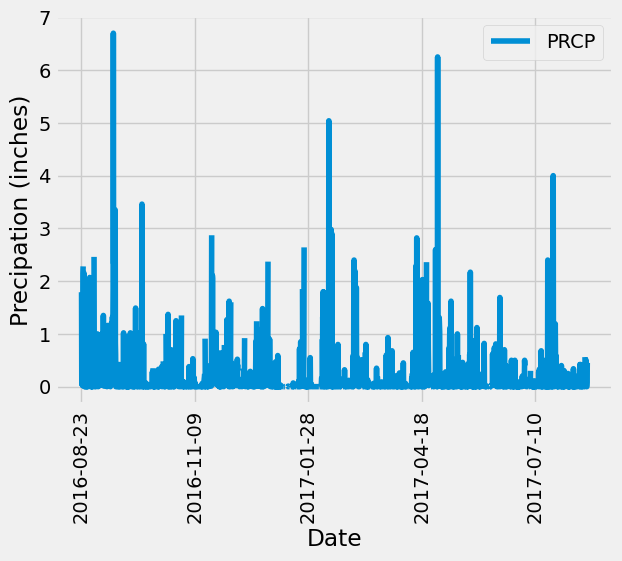

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year = dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

data = session.query(measurement.date,measurement.prcp).filter(measurement.date>=year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data, columns=['Date','PRCP'])

# Sort the dataframe by date
df = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='PRCP', rot=90)
plt.ylabel('Precipation (inches)')

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,PRCP
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
number_stations = session.query(station.station).count()
number_stations

9

In [13]:
 # Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# func.count
# group_by
# order_by
# func.min
active_station = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_station 

most_active_station = active_station[0][0]
most_active_station

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# func.max
# func.avg
activestationquery = [measurement.station, 
      func.min(measurement.tobs),
      func.max(measurement.tobs),
      func.avg(measurement.tobs)]

temp_analysis = session.query(*activestationquery ).\
    filter(measurement.station == most_active_station).all()

print(f"Temperature Analysis for Station {most_active_station}: ")
print(f"  Min Temperature: {temp_analysis[0][1]}")
print(f"  Max Temperature: {temp_analysis[0][2]}")
print(f"  Avg Temperature: {temp_analysis[0][3]}")

Temperature Analysis for Station USC00519281: 
  Min Temperature: 54.0
  Max Temperature: 85.0
  Avg Temperature: 71.66378066378067


In [14]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_temp_stn = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == most_active_station).\
    filter(measurement.date >= year).all()
highest_temp_stn


highest_temp_stn_df = pd.DataFrame(highest_temp_stn, columns = ['Date', 'Tobs'])
highest_temp_stn_df.head()

# df.plot.hist()

,Date,Tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


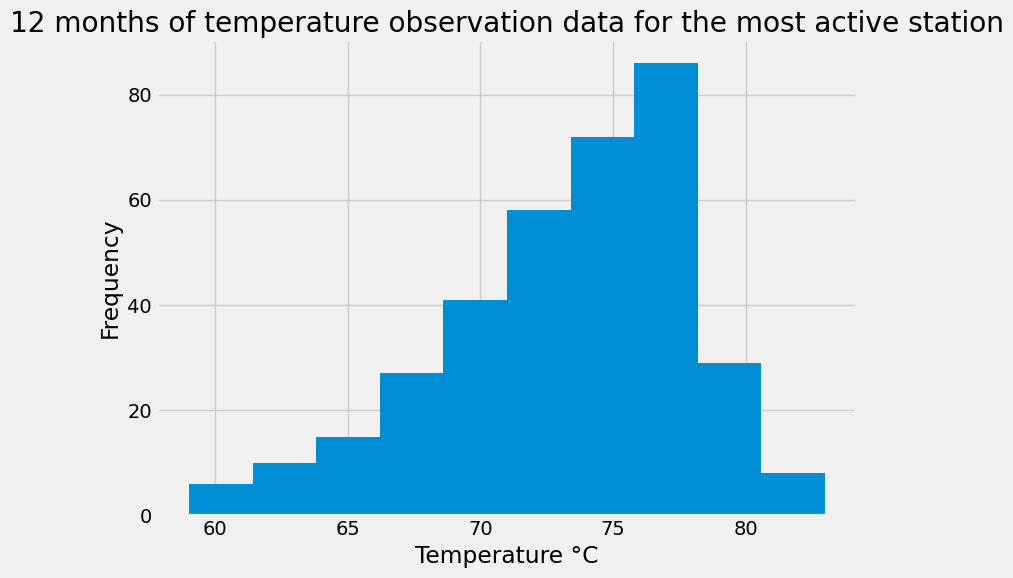

In [15]:
# Plot the histogram 
plt.figure(figsize = (8,6))
plt.hist(highest_temp_stn_df["Tobs"])
plt.title("12 months of temperature observation data for the most active station")
plt.xlabel("Temperature °C")
plt.ylabel("Frequency")
plt.tight_layout()

# Close Session

In [16]:
# Close Session
session.close()